# EN3160 Assignment 2 on Fitting and Alignment

Instructed by Dr. Ranga Rodrigo

Done by: Warren Jayakumar

### Import Required Libraries

In [33]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from pathlib import Path
from scipy . optimize import minimize
from scipy import linalg
import math

In [34]:
DATA_FOLDER = Path('a2images')

### Detect and draw circles in the sunflower field image

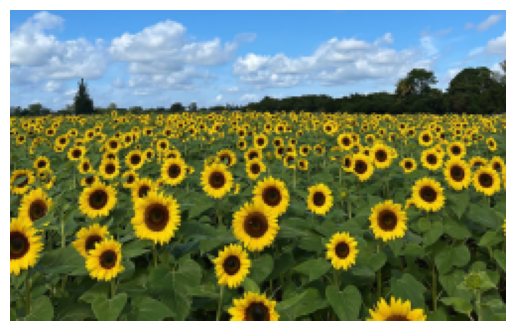

In [35]:
image1 = cv.imread(filename = DATA_FOLDER/'the_berry_farms_sunflower_field.jpeg', 
                   flags = cv.IMREAD_REDUCED_COLOR_4)
plt.imshow(X = cv.cvtColor(src = image1, 
                           code = cv.COLOR_BGR2RGB))
plt.axis(False)
plt.show()

In [36]:
def LoG(sigma):
    hw = round(3*sigma)
    X = np.arange(start = -hw, 
                  stop = hw + 1, 
                  step = 1)
    Y = np.arange(start = -hw,
                  stop = hw + 1,
                  step = 1)
    X, Y = np.meshgrid(X, Y)
    log = ((X**2 + Y**2)/(2*sigma**2) - 1) * np.exp(-(X**2 + Y**2)/(2*sigma**2)) / (np.pi * sigma**4)
    return log

In [37]:
def detect_max(img_log, threshold):
    coordinates = []
    (h, w) = img_log.shape
    k = 1
    for i in range(k, h-k):
        for j in range(k, w-k):
            slice_img = img_log[i-k:i+k+1, j-k:j+k+1]
            max_value = np.max(a = slice_img) # finding maximum
            if max_value >= threshold: # threshold
                x, y = np.unravel_index(indices=slice_img.argmax(), 
                                        shape=slice_img.shape)
                coordinates.append((i+x-k, j+y-k)) #finding co-rdinates
    return set(coordinates)

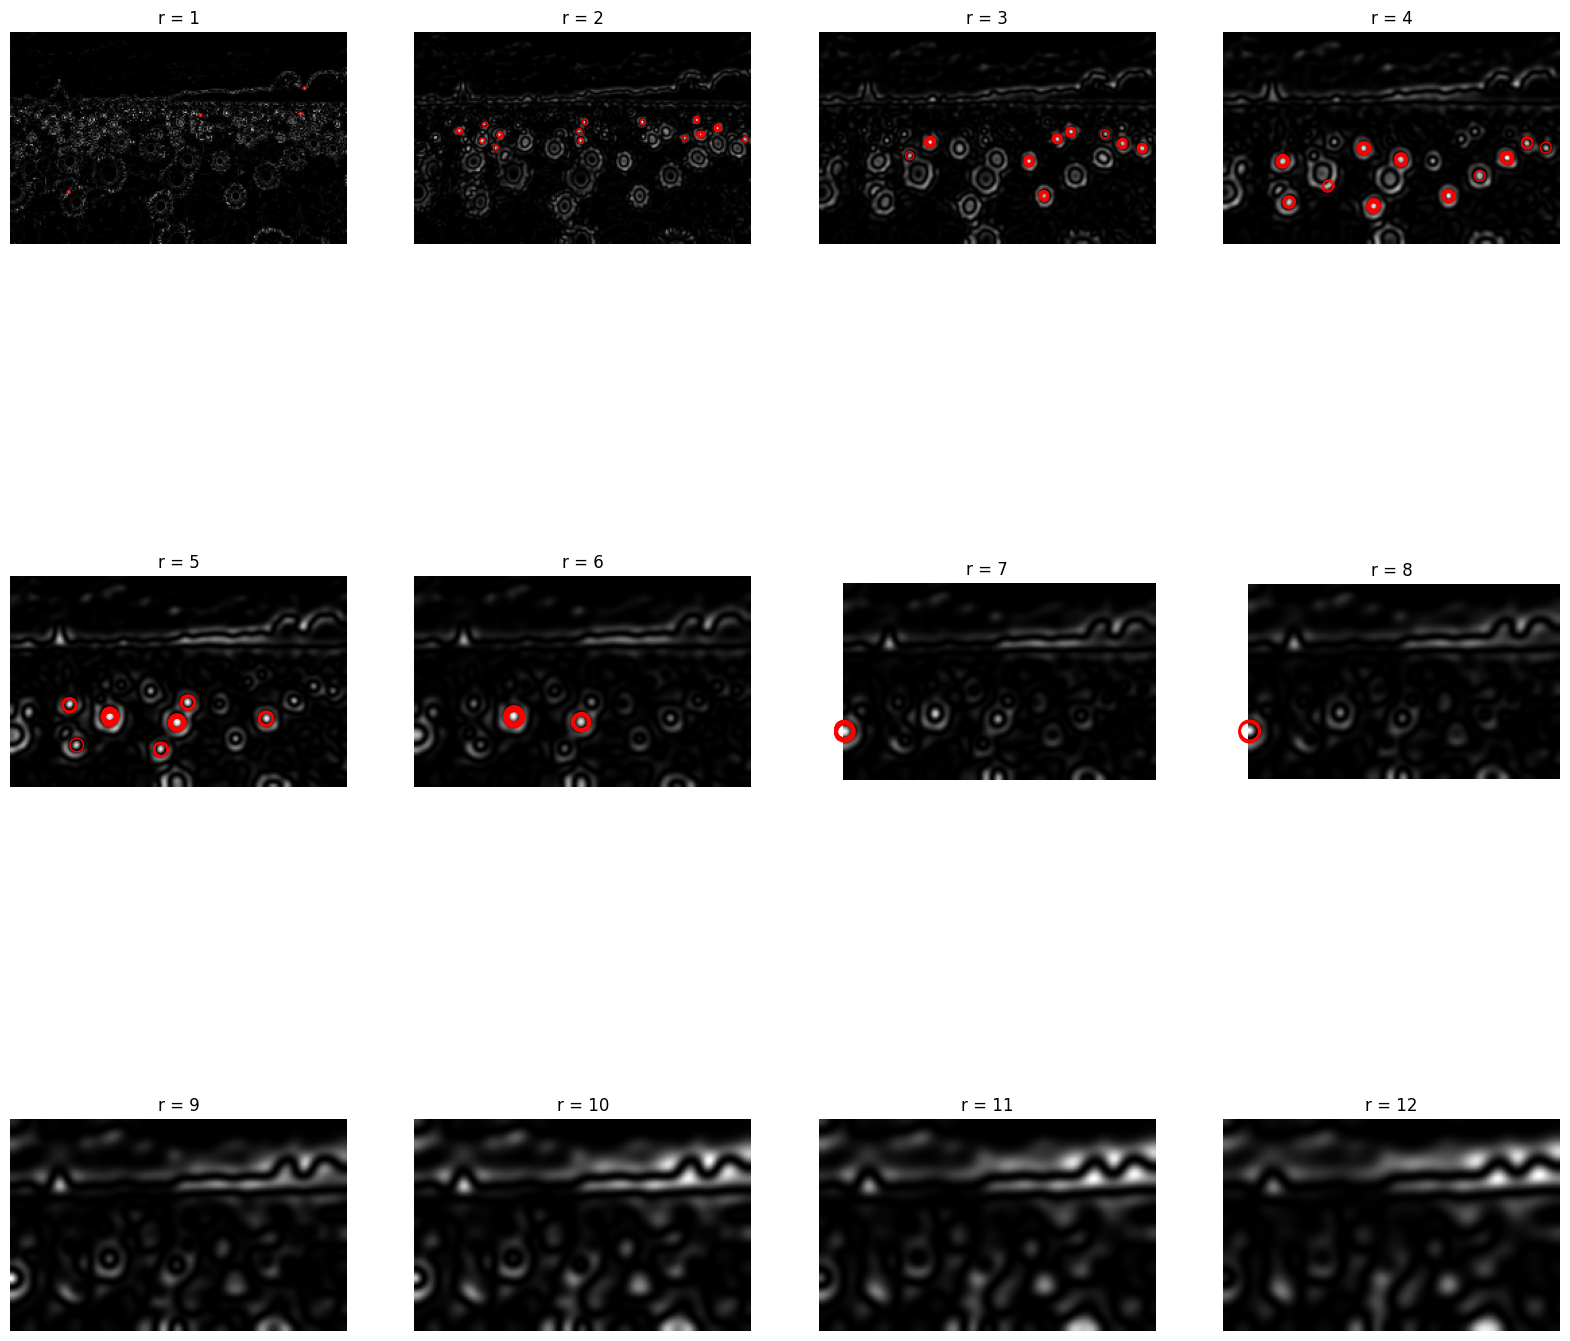

In [38]:
fig, axes = plt.subplots(3, 4, figsize = (20, 20))
image1_gray = cv.cvtColor(image1, cv.COLOR_BGR2GRAY)/255
# Finding local peaks for each sigma
for r, ax in enumerate(axes.flatten(), start = 1):
    sigma = r/np.sqrt(2)
    LOG = sigma**2 * LoG(sigma)
    filtered_image = np.square(cv.filter2D(src = image1_gray,
                                           ddepth = -1,
                                           kernel = LOG))

    coordinates = detect_max(filtered_image, 0.09)

    ax.imshow(filtered_image, cmap = 'gray')
    ax.set_title(f'r = {r}')
    ax.axis('off')
    for x, y in coordinates:
        c = plt.Circle((y, x), sigma * 1.414, color = 'red', linewidth=1, fill=False)
        ax.add_patch(c)
    ax.plot()

plt.axis('off')
plt.show()

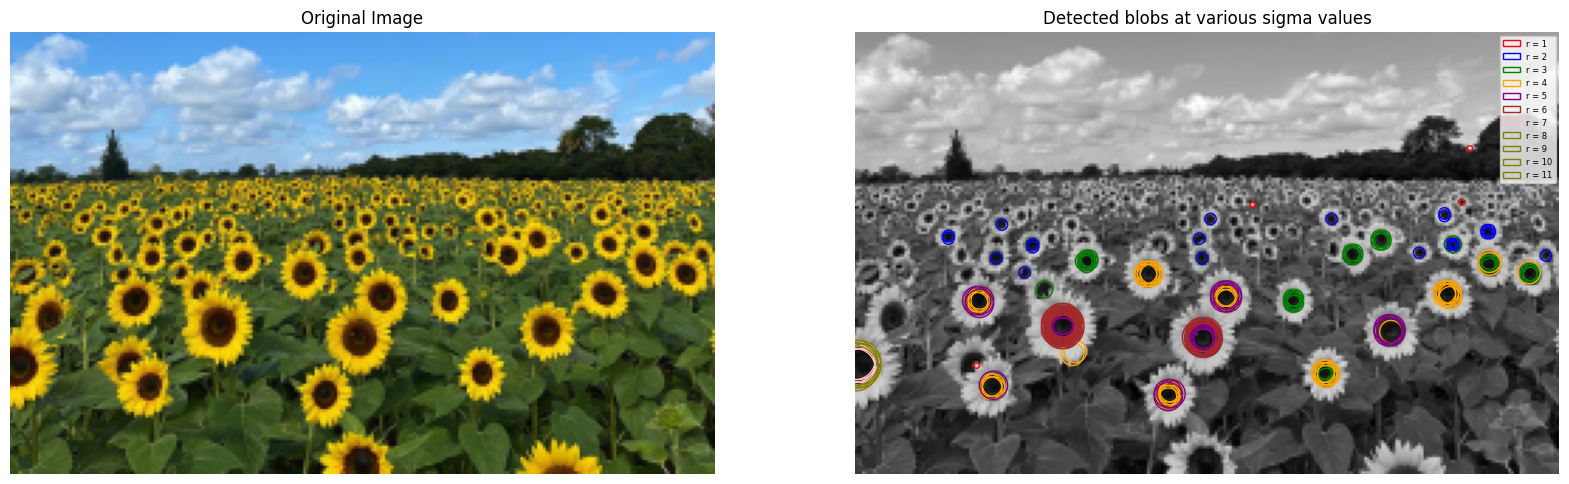

In [39]:
fig, axes = plt.subplots(nrows = 1, 
                         ncols = 2, 
                         figsize = (20, 20))



axes[0].imshow(cv.cvtColor(image1, cv.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[0].axis('off')

ax = axes[1]
ax.imshow(image1_gray, cmap = 'gray')
ax.grid(False)
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'olive', 'gray', 'cyan', 'magenta']

patches = []
labels = []

for r in range(1, 12):
    sigma = r/np.sqrt(2)
    LOG = sigma**2 * LoG(sigma)
    img1_log = np.square(cv.filter2D(image1_gray, -1, LOG))

    coordinates = detect_max(img1_log,0.09)

    for x, y in coordinates:
        c = plt.Circle((y, x), sigma * 1.414, color = colors[r-1], linewidth=1, fill=False)
        ax.add_patch(c)
    patches.append(c)
    labels.append(f'r = {r}')
    ax.plot()
ax.set_xlim(0, image1_gray.shape[1])

plt.axis('off')
ax.legend(patches, labels, loc='best', fontsize=6)
ax.set_title("Detected blobs at various sigma values")
plt.show()

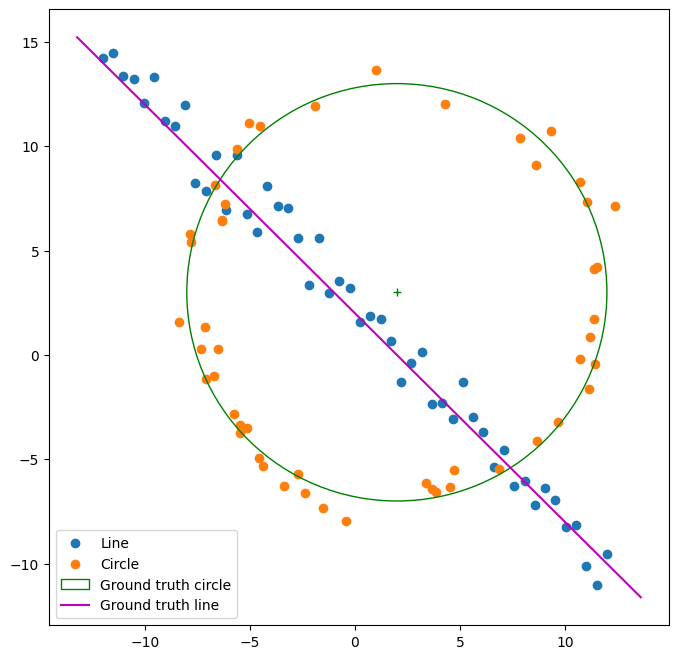

In [40]:
# Set random seed
np.random.seed(0)
# Constants
N = 100
half_n = N // 2

r = 10
x0_gt, y0_gt = 2, 3 # Center
s = r / 16
t = np.random.uniform(0, 2 * np.pi, half_n)
n = s * np.random.randn(half_n)
x, y = x0_gt + (r + n) * np.cos(t), y0_gt + (r + n) * np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

s, m, b = 1, -1, 2
x = np.linspace(-12, 12, half_n)
y = m * x + b + s * np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

X = np.vstack((X_circ, X_line)) # All points


fig, ax = plt.subplots(1, 1, figsize=(8, 8))

ax.scatter(X_line[:, 0], X_line[:, 1], label='Line')
ax.scatter(X_circ[:, 0], X_circ[:, 1], label='Circle')

circle_gt = plt.Circle((x0_gt, y0_gt), r, color='g', fill=False, label='Ground truth circle')
ax.add_patch(circle_gt)
ax.plot(x0_gt, y0_gt, '+', color='g')

x_min, x_max = ax.get_xlim()
x_ = np.array([x_min, x_max])
y_ = m * x_ + b
plt.plot(x_, y_, color='m', label='Ground truth line')

plt.legend()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0719391253698554
            Iterations: 7
            Function evaluations: 32
            Gradient evaluations: 7
rex.x:  [0.71347493 0.70068076 1.64075648]
Iteration =  0 . No. inliners =  41
Optimization terminated successfully    (Exit mode 0)
            Current function value: 9.730058110113287
            Iterations: 4
            Function evaluations: 22
            Gradient evaluations: 4
[0.72055343 0.69339942 1.5791152 ] 9.730058110113287
A better model found ...  [0.72055343 0.69339942 1.5791152 ] 9.730058110113287
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.35478733604453955
            Iterations: 7
            Function evaluations: 32
            Gradient evaluations: 7
rex.x:  [0.72299925 0.69084881 1.6294739 ]
Iteration =  1 . No. inliners =  45
Optimization terminated successfully    (Exit mode 0)
            Current function val

c:\Users\warre\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\optimize\_minimize.py:726: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)
c:\Users\warre\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\optimize\_minimize.py:726: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: 0.018801
         Iterations: 54
         Function evaluations: 428
         Gradient evaluations: 104
res.x:  [1450.5104097   475.33700374 1530.14959525]
Iteration =  32 . No. inliers =  8
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 17
         Function evaluations: 72
         Gradient evaluations: 18
res.x:  [ 5.42389195  2.23506569 12.25058211]
Iteration =  33 . No. inliers =  22
Optimization terminated successfully.
         Current function value: 1.829334
         Iterations: 8
         Function evaluations: 40
         Gradient evaluations: 10
[ 4.26610049  2.62720638 11.48413709] 1.8293341257523297
A better model found ... [ 4.26610049  2.62720638 11.48413709] 1.8293341257523297
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 56
         Gradient evaluations: 14
res.x:  [ 2.89614273  2.3471499  10.57137

c:\Users\warre\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\optimize\_minimize.py:726: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)
c:\Users\warre\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\optimize\_minimize.py:726: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 159
         Function evaluations: 772
         Gradient evaluations: 193
res.x:  [ 2.82079799 12.7406312  11.09477847]
Iteration =  85 . No. inliers =  5
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 15
         Function evaluations: 68
         Gradient evaluations: 17
res.x:  [3.43946656 3.33628287 9.45783046]
Iteration =  86 . No. inliers =  20
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 44
         Gradient evaluations: 11
res.x:  [2.15542487 1.68432507 9.70688961]
Iteration =  87 . No. inliers =  34
Optimization terminated successfully.
         Current function value: 6.166870
         Iterations: 10
         Function evaluations: 52
         Gradient evaluations: 13
[2.03613    2.29335206 9.65131963] 6.166869822596577
Optimization term

c:\Users\warre\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\optimize\_minimize.py:726: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)
c:\Users\warre\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\optimize\_minimize.py:726: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)
c:\Users\warre\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\optimize\_minimize.py:726: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)
c:\Users\warre\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\optimize\_minimize.py:726: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)
c:\U

         Current function value: 0.000000
         Iterations: 25
         Function evaluations: 284
         Gradient evaluations: 68
res.x:  [13.55774332  8.49386257 21.5926794 ]
Iteration =  131 . No. inliers =  15
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 17
         Function evaluations: 76
         Gradient evaluations: 19
res.x:  [2.97531847 8.58794214 9.53016624]
Iteration =  132 . No. inliers =  8
         Current function value: 0.019676
         Iterations: 35
         Function evaluations: 304
         Gradient evaluations: 76
res.x:  [ -479.7004537  -1067.1922777   1182.83042145]
Iteration =  133 . No. inliers =  6
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 60
         Gradient evaluations: 15
res.x:  [1.83810851 2.2130549  9.18569124]
Iteration =  134 . No. inliers =  37
Optimization terminated successfully.
         Curren

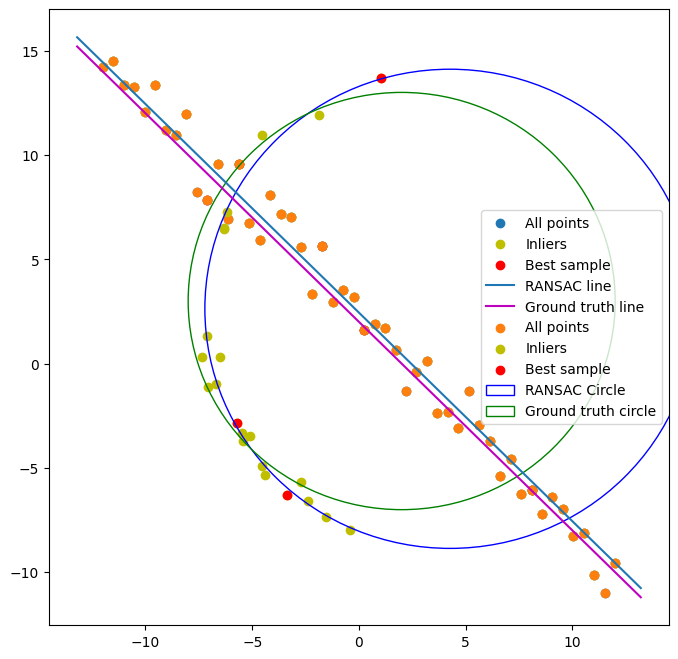

In [46]:
def dist(p1, p2):
    (x1, y1), (x2, y2) = p1, p2
    return ((x1 - x2)**2 + (y1 - y2)**2)**0.5

def line_eq(p1, p2):
    (x1, y1), (x2, y2) = p1, p2
    a = (y2 - y1)
    b = -(x2 - x1)
    d = a*x1 + b*y1
    assert abs(a*x2 + b*y2 - d) < 1e-8
# Item 2: Total least squares line fitting with scicpy.optimize with RANSAC
N = X_line.shape[0]
X_ = X_line

def line_equation_from_points(x1, y1, x2, y2):
    # Calculate the direction vector (Δx, Δy)
    delta_x = x2 - x1
    delta_y = y2 - y1

    # Calculate the normalized vector (a, b)
    magnitude = math.sqrt(delta_x**2 + delta_y**2)
    a = delta_y / magnitude
    b = -delta_x / magnitude

    # Calculate d
    d = (a * x1) + (b * y1)

    # Return the line equation in the form ax + by = d
    return a, b, d

# RANSAC to fit a line
def line_tls(x, indices):
    a, b, d = x[0], x[1], x[2]
    return np.sum(np.square(a*X_[indices,0] + b*X_[indices,1] - d))

# Constraint
def g(x):
    return x[0]**2 + x[1]**2 - 1

cons = ({'type': 'eq', 'fun': g})

# Computing the consensus (inliers)
def consensus_line(X, x, t):
    a, b, d = x[0], x[1], x[2]
    error = np.absolute(a*X_[:,0] + b*X_[:,1] - d)
    return error < t

t = 1.   # Threshold value to determine data points that are fit well by model.
d = 0.4*N   # Number of close data points required to assert that a model fits well to data.
s = 5       # Minimum number of data points required to estimate model parameters.

inliers_line = []        # Indinces of the inliers
max_iterations = 100
iteration = 0
best_model_line = []     # Best model normal (a, b) and distance from origin d
best_error = np.inf
best_sample_line = []    # Three-point sample leading to the best model computation
res_only_with_sample = [] # Result (a, b, d) only using the best sample
best_inliers_line = []   # Inliers of the model computed form the best sample

while iteration < max_iterations:   
    indices = np.random.randint(0, N, s) # A sample of three (s) points selected at random
    x0 = np.array([1, 1, 0]) # Initial estimate
    res = minimize(fun = line_tls, args = indices, x0 = x0, tol= 1e-6, constraints=cons, options={'disp': True})
    inliers_line = consensus_line(X_, res.x, t) # Computing the inliers
    print('rex.x: ', res.x)    
    print('Iteration = ', iteration, '. No. inliners = ', inliers_line.sum())
    if inliers_line.sum() > d:
        x0 = res.x
        # Computing the new model using the inliers
        res = minimize(fun = line_tls, args = inliers_line, x0 = x0, tol= 1e-6, constraints=cons, options={'disp': True})
        print(res.x, res.fun)
        if res.fun < best_error:
            print('A better model found ... ', res.x, res.fun)
            best_model_line = res.x
            best_eror = res.fun
            best_sample_line = X_[indices,:]
            res_only_with_sample = x0
            best_inliers_line = inliers_line

    iteration += 1

print('Best line model', best_model_line)

fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.scatter(X_line[:,0],X_line[:,1], label='All points')
ax.scatter(X_[best_inliers_line,0],X_[best_inliers_line,1], color='y', label='Inliers')
ax.scatter(best_sample_line[:,0],best_sample_line[:,1], color='r', label='Best sample')
x_min, x_max = ax.get_xlim()
x_ = np.array([x_min, x_max])
y_ = (-best_model_line[1]*x_ + best_model_line[2])/best_model_line[1]
plt.plot(x_, y_,  label='RANSAC line')
x_ = np.array([x_min, x_max])
y_ = m*x_ + b
plt.plot(x_, y_, color='m', label='Ground truth line')

def dist_circle(params, X, indices):
    xc, yc, r = params
    return np.sum(np.square(np.sqrt((X[indices, 0] - xc)**2 + (X[indices, 1] - yc)**2) - r))

# RANSAC consensus for a circle
def consensus_circle(X, params, t):
    xc, yc, r = params
    error = np.abs(np.sqrt((X[:, 0] - xc)**2 + (X[:, 1] - yc)**2) - r)
    return error < t

# Threshold value for fitting points to the circle model
t = 1.0   # Allowable distance error for points to be considered inliers
d = 0.4 * N  # Number of points required to assert that the model fits well
s = 3       # Minimum number of points to estimate the circle (3 points define a circle)

N = X_circ.shape[0]
X_ = X_circ

inliers_circle = []
max_iterations = 200
iteration = 0
best_model_circle = []  # Best model (xc, yc, r)
best_error = np.inf
best_sample_circle = []  # The best sample leading to best circle computation
best_inliers_circle = []  # Inliers for the best model

while iteration < max_iterations:
    indices = np.random.randint(0, N, s)  # Randomly select 3 points
    x0 = np.array([2, 3, 1])  # Initial guess for circle center (xc, yc) and radius r
    res = minimize(fun=dist_circle, args=(X_, indices), x0=x0, tol=1e-6, options={'disp': True})
    
    inliers_circle = consensus_circle(X_, res.x, t)  # Determine inliers based on the current model
    print('res.x: ', res.x)
    print('Iteration = ', iteration, '. No. inliers = ', inliers_circle.sum())
    
    if inliers_circle.sum() > d:
        x0 = res.x
        # Recompute the model using the inliers
        res = minimize(fun=dist_circle, args=(X_, inliers_circle), x0=x0, tol=1e-6, options={'disp': True})
        print(res.x, res.fun)
        
        if res.fun < best_error:
            print('A better model found ...', res.x, res.fun)
            best_model_circle = res.x
            best_error = res.fun
            best_sample_circle = X_[indices, :]
            best_inliers_circle = inliers_circle
    
    iteration += 1

print('Best circle model:', best_model_circle)

# Visualization
ax.scatter(X_line[:, 0], X_line[:, 1], label='All points')
ax.scatter(X_[best_inliers_circle, 0], X_[best_inliers_circle, 1], color='y', label='Inliers')
ax.scatter(best_sample_circle[:, 0], best_sample_circle[:, 1], color='r', label='Best sample')

# Plot the best circle
circle = plt.Circle((best_model_circle[0], best_model_circle[1]), best_model_circle[2], color='b', fill=False, label='RANSAC Circle')
circle_gt = plt.Circle((x0_gt, y0_gt), 10, color='g', fill=False, label='Ground truth circle')
ax.add_artist(circle)
ax.add_artist(circle_gt)

plt.legend()
plt.show()